# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import os

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# Load data
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# print shape of data
print(f"There are {data.shape[0]} row and {data.shape[1]} columns in this table")

There are 3454 row and 15 columns in this table


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


<IPython.core.display.Javascript object>

In [5]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

In [7]:
# convert columns with object data types to categories
for column in df:
    if df[column].dtype == "object":
        df[column] = df[column].astype("category")

<IPython.core.display.Javascript object>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 312.2 KB


<IPython.core.display.Javascript object>

In [9]:
# checking for duplicate rows
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [10]:
# checking for duplicates in columns
for column in df:
    print(f"{column}:{df[column].duplicated().sum()}")

brand_name:3420
os:3450
screen_size:3312
4g:3452
5g:3452
main_camera_mp:3412
selfie_camera_mp:3416
int_memory:3438
ram:3441
battery:3129
weight:2898
release_year:3446
days_used:2530
new_price:466
used_price:360


<IPython.core.display.Javascript object>

In [11]:
# checking for missing values in the data
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations
- only 6 columns have missing values
- The column with the highest number of missing valuse is "main_camera_mp"

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

## Exploratory Data Analysis

In [12]:
### Statistical Summary
df.describe(include="all")

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,237.038848,92.302936
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,194.302782,54.701648
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,18.200000,4.650000
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,120.342500,56.482500
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,189.785000,81.870000
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,291.115000,116.245000


<IPython.core.display.Javascript object>

#### Observations
- There are 3454 devices and made by 34 unique brands
- All devices run one of 4 operating systems
- The mean screen size for these mobile devices is 13.713 inches
- The mean used price is 92.3 compared to 237 for a brand new device
- There is a high number of devices with brands not listed
- Android is the most popular operating system for these devices

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Looking at Numberical Variables

**`used_price`**

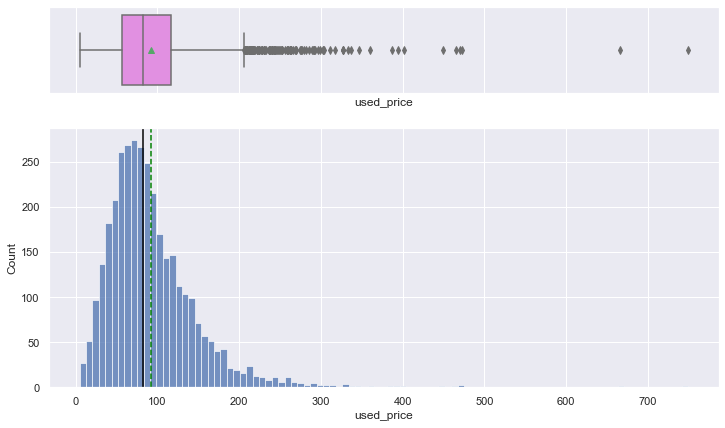

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "used_price")

### Question 1.	What does the distribution of used device prices look like?

#### Ans:
- Ther are no missing values
- The price of used devices is slightly right-skewed and also outlier heavy towards the right
- Lets apply the log scale to make it closer to normal and get a better sense of distribution

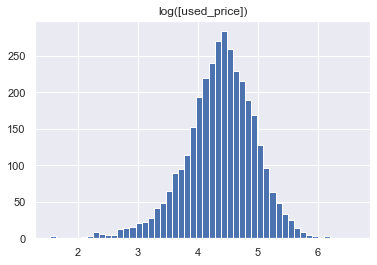

<IPython.core.display.Javascript object>

In [15]:
plt.hist(np.log(df["used_price"]), 50)
plt.title("log([used_price])")
plt.show()

In [16]:
# new column with log of unit price added
df["used_price_log"] = np.log(df["used_price"])

<IPython.core.display.Javascript object>

**`screen_size`**

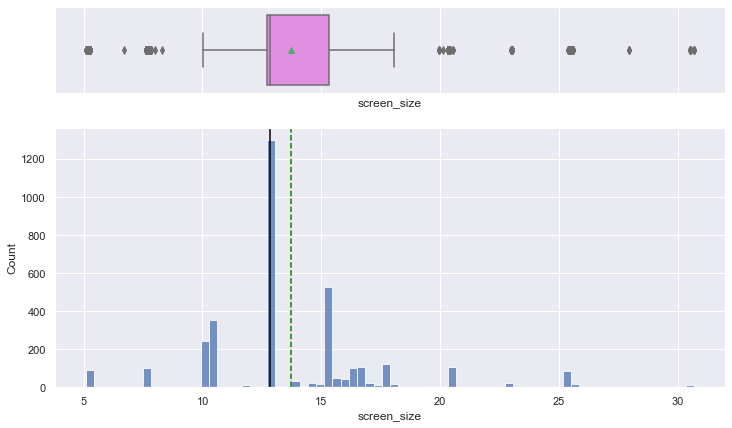

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "screen_size")

**`main_camera_mp`**

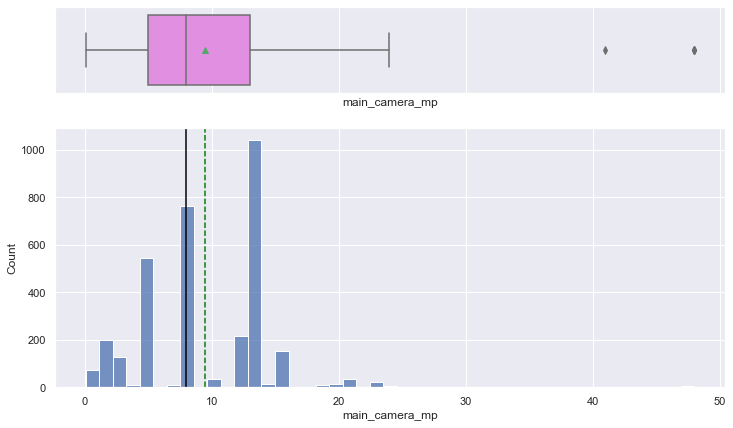

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "main_camera_mp")

**`selfie_camera_mp`**

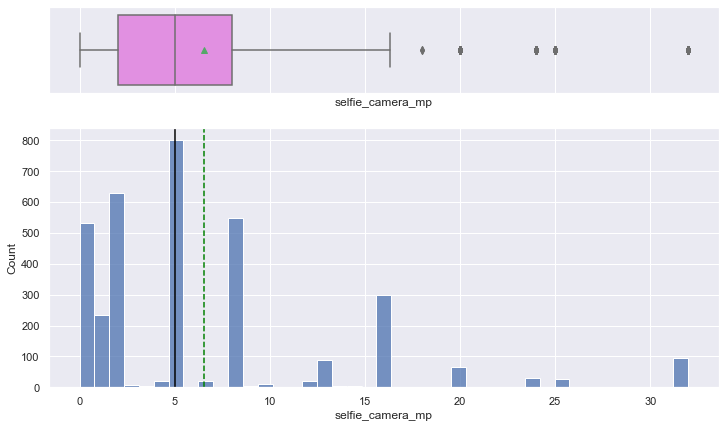

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "selfie_camera_mp")

**`int_memory`**

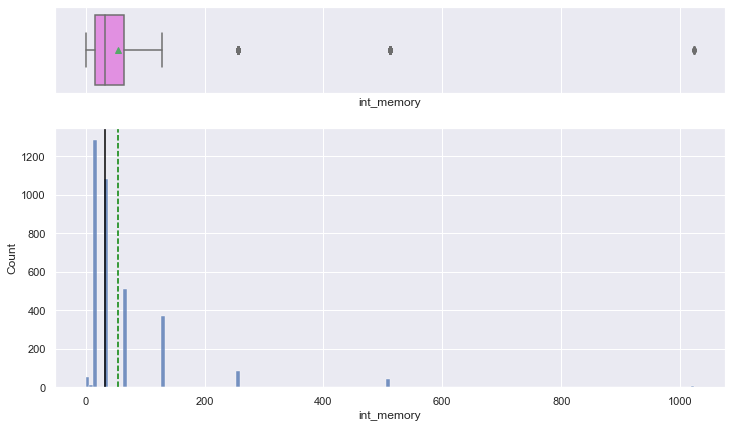

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "int_memory")

**`ram`**

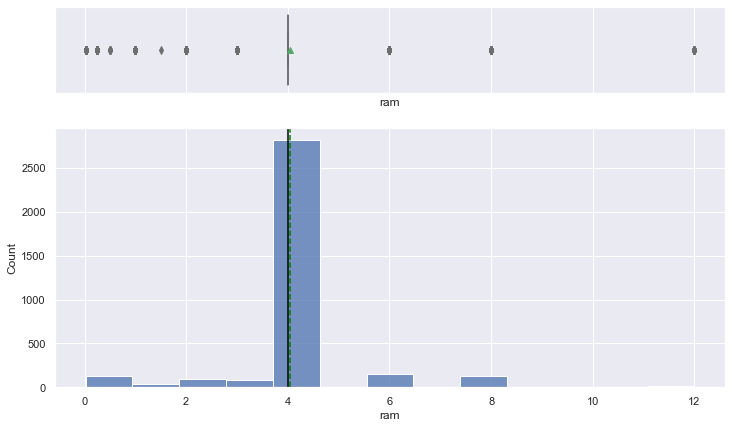

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "ram")

**`battery`**

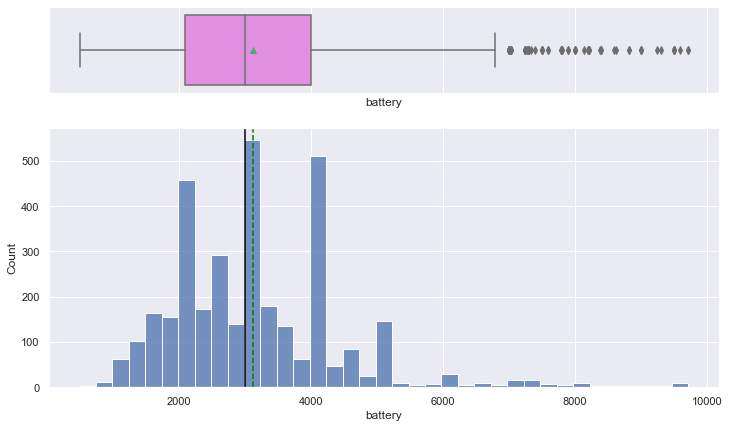

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "battery")

**`weight`**

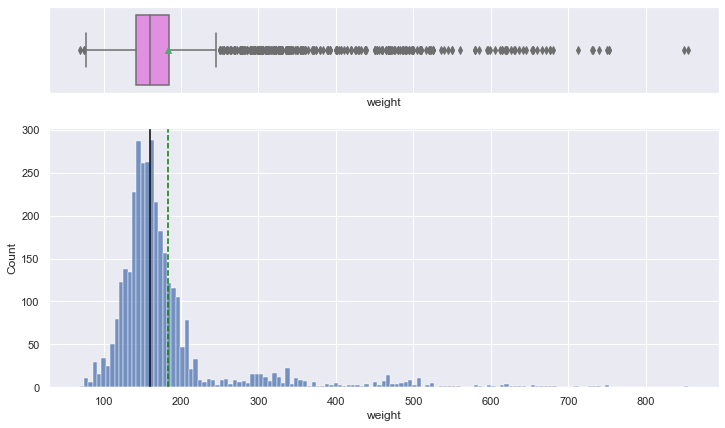

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "weight")

**`release_year`**

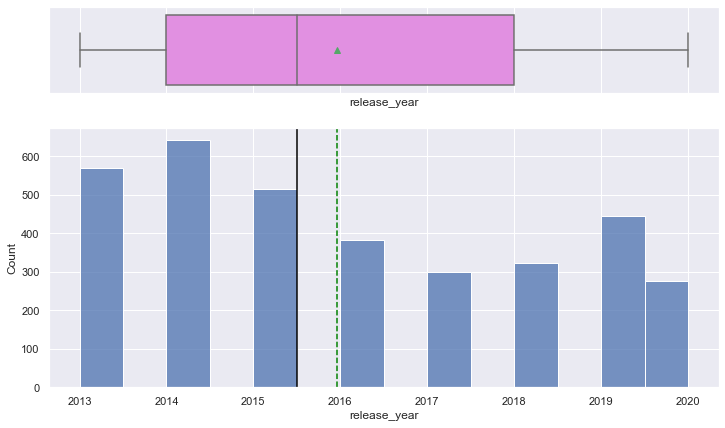

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "release_year")

**`days_used`**

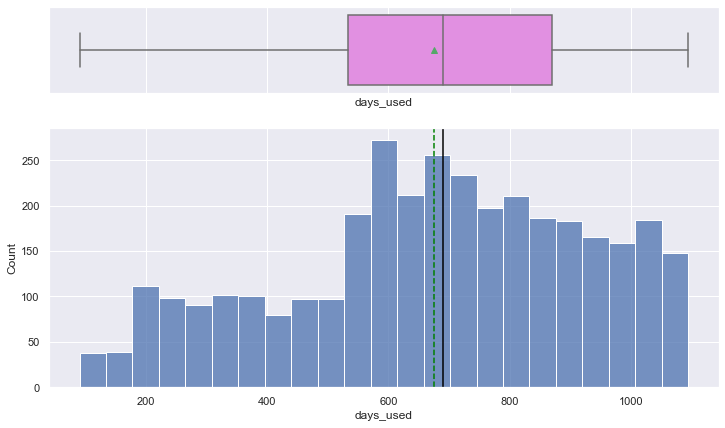

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "days_used")

**`new_price`**

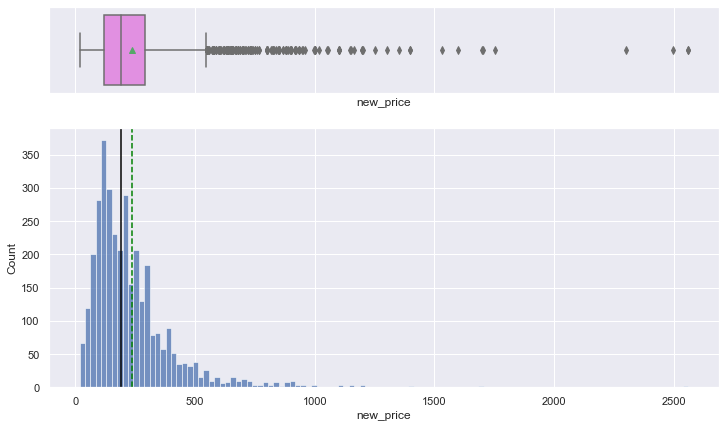

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "new_price")

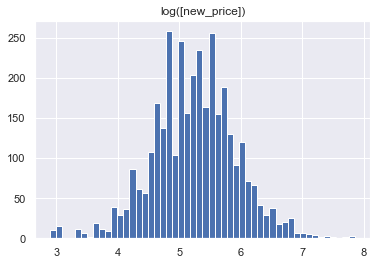

<IPython.core.display.Javascript object>

In [27]:
# Lets bring new prices distribution closer to normal with a log transformation
plt.hist(np.log(df["new_price"]), 50)
plt.title("log([new_price])")
plt.show()

In [28]:
# new column with log of unit price added
df["new_price_log"] = np.log(df["new_price"])

<IPython.core.display.Javascript object>

##### Observations for Univariate Analysis
- Used prices is skewed to the right with a very high number of outliers
- The main_camera_mp, screen_size, selfie_camera_mp, int_memory, ram, battery all have outliers with some tilted heavily to right and this indicates that the different brands have their individual standards with regards how these features are decided
- New price and weight are also heavily skewed to the right and this signifies that specific brands focus on making larger mobile devices that could possibly double as a phone and tablet hence a cluster of heavy and more expenses devices to the right

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Looking at Categorical Variables

**`brand name`**

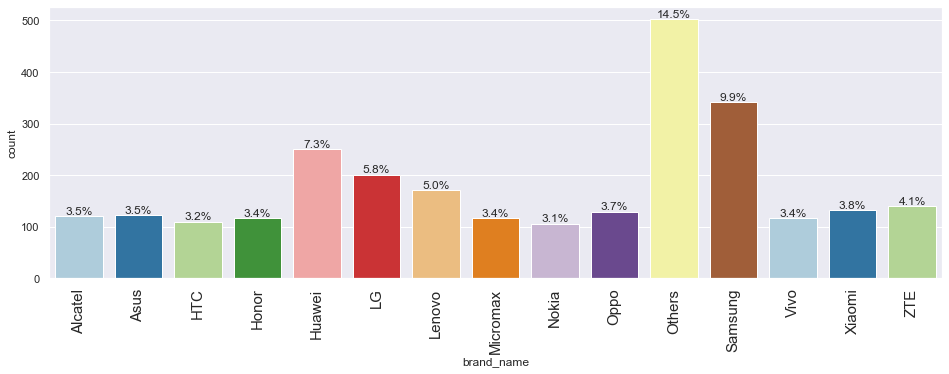

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "brand_name", perc=True, n=15)

**`os`**

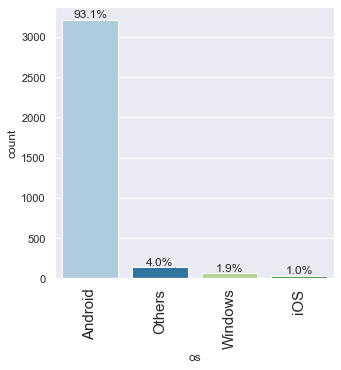

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "os", perc=True)

In [32]:
d = df[df["os"] == "Android"]["os"].count()
print(f"There are {d} Android devices")

There are 3214 Android devices


<IPython.core.display.Javascript object>

### Question 2. What percentage of the used device market is dominated by Android devices?

#### Ans:
- WIth a total of 3214 Android devices, 93.1% of the used devices market is dominated by Android devices based on this dataset

**`4g`**

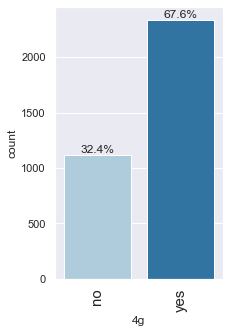

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "4g", perc=True)

**`5g`**

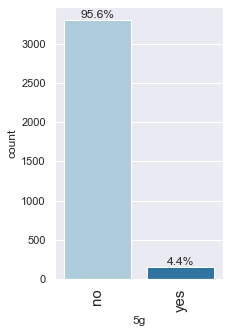

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "5g", perc=True)

**`release_year`**

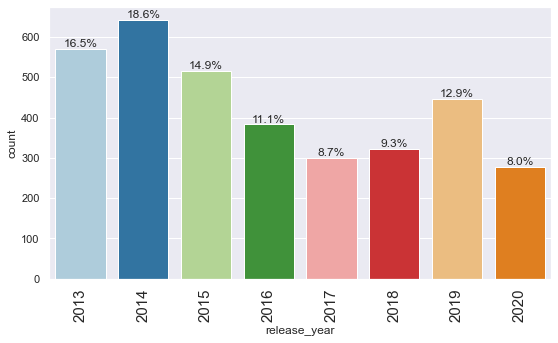

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "release_year", perc=True)

#### Observations categorical variable in univariate analysis
- 4g is available on 67.6% of devices while 5g is available on only 4.4%
- Samsung is the known brand with the highest number of devices, the brand name for about 14.5% of devices in not known
- Android is the most popular operating systems found in 93.1% of devices
- 2014 saw the release of the highest number of new mobile devices

### Bivariate Analysis

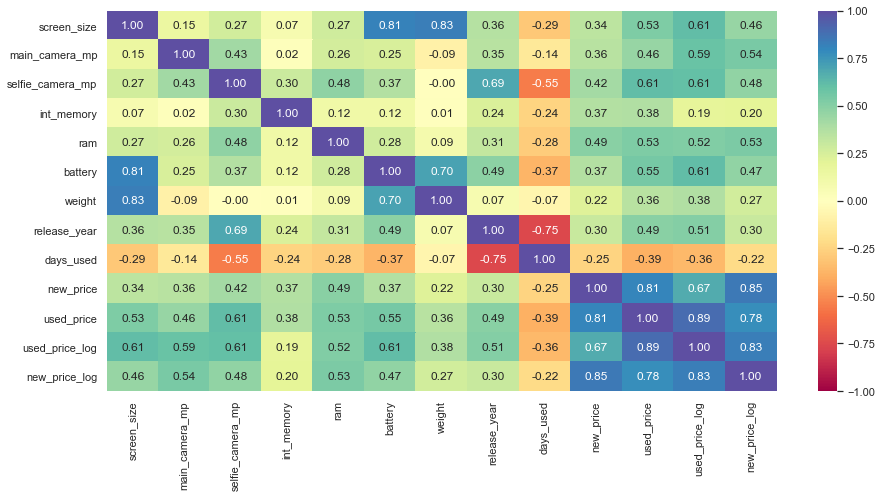

<IPython.core.display.Javascript object>

In [36]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- There is a strong correlation between used and new prices
- There is a strong positive correlation between weight and battery size
- There is a positive correlation between release year and resolution of selfie camera
- There is a positive correlation between used price and resolution of selfie camera
- There is a strong negatibe correlation between days used and release year
- There is a stromg positive correlation between battery size and screen size

### Question 3.The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

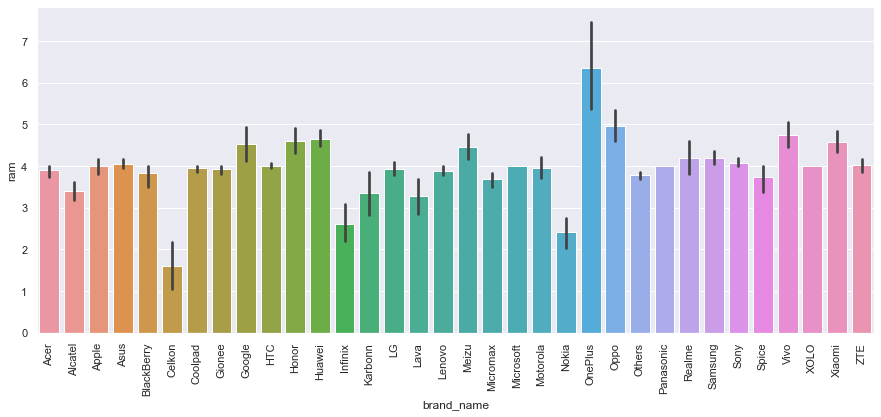

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 6))
sns.barplot(x="brand_name", y="ram", data=df)
plt.xticks(rotation=90)
plt.show()

#### Ans
- The average RAM across all brands is about 4.036 GB
- The OnePlus brand has the highest RAM followed by Oppo
- The Celkon brand has the lowest RAM followed by Nolia and Infinix


### Question 4.	A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [38]:
# create sepereate dataframe for devices with batteries larger than 4500mAh for analysis
df_large_batteries = df[df["battery"] > 4500]
df_large_batteries.shape

(341, 17)

<IPython.core.display.Javascript object>

In [39]:
df_large_batteries.groupby("brand_name")["weight"].mean().sort_values(ascending=True)


brand_name
Micromax      118.000000
Spice         158.000000
Panasonic     182.000000
Infinix       193.000000
Oppo          195.000000
ZTE           195.400000
Vivo          195.630769
Realme        196.833333
Motorola      200.757143
Gionee        209.430000
Xiaomi        231.500000
Honor         248.714286
Asus          313.772727
Nokia         318.000000
Acer          360.000000
LG            366.058333
Alcatel       380.000000
Others        390.546341
Huawei        394.486486
Samsung       398.352000
HTC           425.000000
Sony          439.500000
Apple         439.558824
Lenovo        442.721429
Google        517.000000
BlackBerry           NaN
Celkon               NaN
Coolpad              NaN
Karbonn              NaN
Lava                 NaN
Meizu                NaN
Microsoft            NaN
OnePlus              NaN
XOLO                 NaN
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

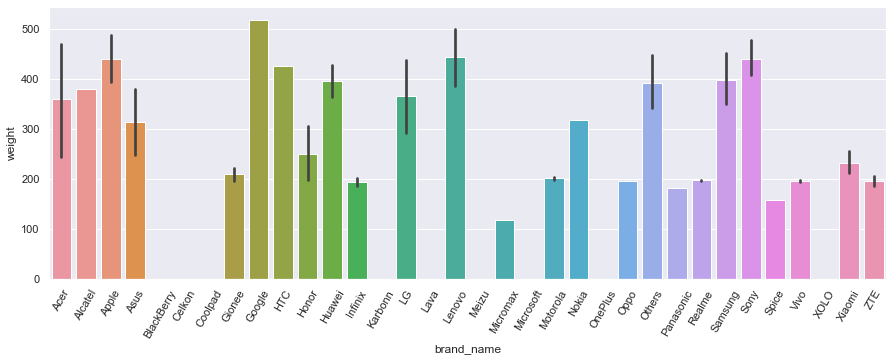

<IPython.core.display.Javascript object>

In [40]:
## Create barplot for 'brand_name' and 'weight'
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_batteries, x="brand_name", y="weight")
plt.xticks(rotation=60)
plt.show()

#### Ans
- There sre 25 brands that have devices with batteries more than 4500mAH
- The Google brand are the heaviest followed by Lenoveo, Sony and Apple
- Micromax brands have the lightest phones out of all with more than 4500mAH batteries follwed by Spice
- We can also see that the brands with NaN values such as Blackberry, Celkon etc. probably don't make devices with batteries as big as 4500mAH

### Question 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [41]:
# create sepereate dataframe for devices with screen sizes larger than 6 inches for analysis
df_large_screen_size = df[df["screen_size"] > 6]
df_large_screen_size.shape

(3362, 17)

<IPython.core.display.Javascript object>

In [42]:
df_large_screen_size.groupby("brand_name")["screen_size"].mean().sort_values(
    ascending=True
)

brand_name
Celkon        10.240400
BlackBerry    11.075714
Spice         11.411333
Karbonn       11.428966
Lava          11.715000
XOLO          11.926122
Micromax      11.953333
Gionee        12.429464
HTC           12.511273
Panasonic     12.612553
Microsoft     12.653182
ZTE           12.888571
Nokia         12.994306
Coolpad       13.013636
Alcatel       13.247130
LG            13.307360
Others        13.432797
Motorola      13.562925
Sony          13.706395
Meizu         13.826774
Oppo          14.170388
Samsung       14.508024
Google        14.643333
Xiaomi        14.904848
Acer          14.949608
Asus          15.010902
Vivo          15.118803
Lenovo        15.239415
Honor         15.491466
OnePlus       15.550455
Huawei        15.600558
Realme        15.628780
Infinix       15.756000
Apple         18.510256
Name: screen_size, dtype: float64

<IPython.core.display.Javascript object>

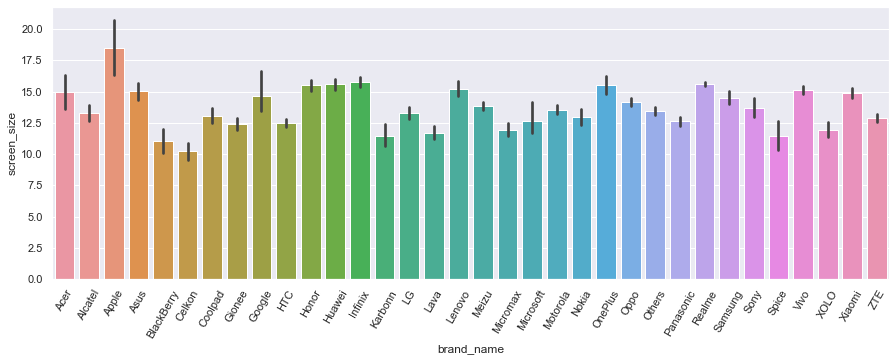

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_screen_size, x="brand_name", y="screen_size")
plt.xticks(rotation=60)
plt.show()

#### Ans
- The Apple brand has the highest screen size generally followed by OnePlus and Infinix and Realme
- Celcon devices have the smallest screen size on average compared to other brands for devices with screes larger than 6 inches

### Question 6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

#### Let's create a new column device_category from the new_price column to tag devices as budget, mid-ranger, or premium

In [44]:
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

df["device_category"].value_counts()

Budget        1844
Mid-ranger    1025
Premium        585
Name: device_category, dtype: int64

<IPython.core.display.Javascript object>

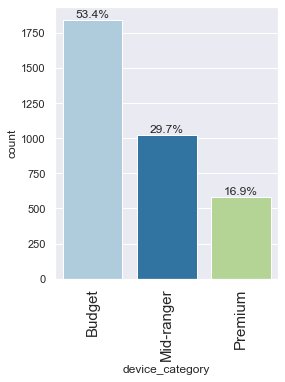

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(df, "device_category", perc=True)

#### Lets look at the distribution of budget devices offering greater than 8MP selfie cameras across brands

In [46]:
df_selfie = df[df["selfie_camera_mp"] > 8]
df_selfie.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,device_category
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,5.162097,5.519018,Mid-ranger
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,200.32,132.43,4.886054,5.299916,Mid-ranger
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,499.68,217.73,5.383256,6.213968,Premium
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,221.13,101.25,4.617593,5.398751,Mid-ranger
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,249.12,151.77,5.022366,5.517935,Mid-ranger


<IPython.core.display.Javascript object>

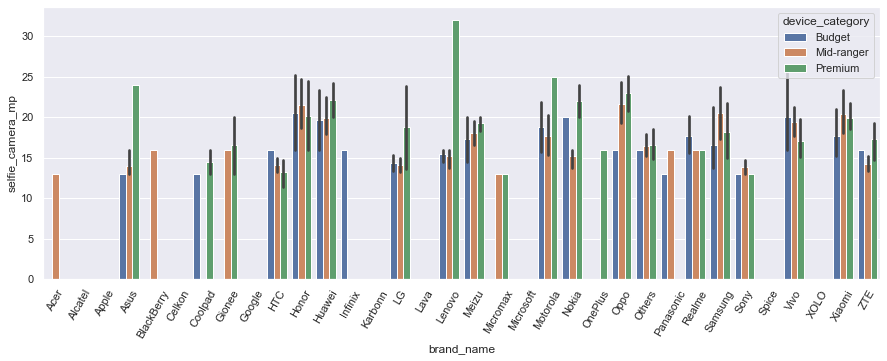

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_selfie, x="brand_name", y="selfie_camera_mp", hue="device_category")
plt.xticks(rotation=60)
plt.show()

#### Ans
- There is a good range of budget devices offering a minimum of 8MP selfie cameras
- The Honor brand offeres the highest quality of selfie cameras followed closely by Nokia and Vivo
- Asus, Coolpad, Panasonic and Sony brands offer the lowest quality of selfie cameras

#### Let's do a similar analysis for rear cameras offering greater than 16MP across brands

In [48]:
#
df_main = df[df["main_camera_mp"] > 16]
df_main.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,device_category
210,ZTE,Android,16.89,yes,no,48.0,16.0,128.0,8.0,5000.0,215.0,2019,336,819.57,289.47,5.668052,6.708780,Premium
215,ZTE,Android,16.89,yes,no,48.0,16.0,64.0,6.0,5000.0,215.0,2019,506,501.56,193.20,5.263726,6.217723,Premium
428,Acer,Windows,12.83,yes,no,21.0,8.0,32.0,4.0,2870.0,150.0,2015,824,219.47,98.59,4.590970,5.391216,Mid-ranger
595,Others,Android,15.24,yes,no,24.0,8.0,64.0,4.0,3500.0,204.4,2015,924,488.18,156.56,5.053439,6.190684,Premium
686,Others,Android,12.83,yes,no,20.7,8.0,64.0,4.0,2950.0,193.0,2016,608,249.62,124.49,4.824225,5.519940,Mid-ranger


<IPython.core.display.Javascript object>

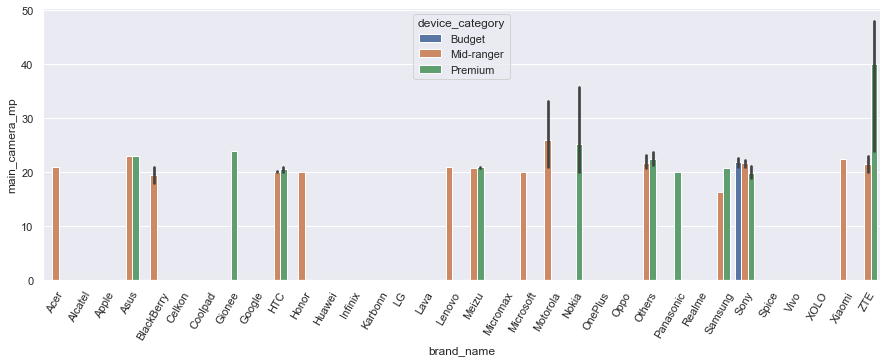

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_main, x="brand_name", y="main_camera_mp", hue="device_category")
plt.xticks(rotation=60)
plt.show()

#### Let's understand the behaviour of the price of used devices across the years.

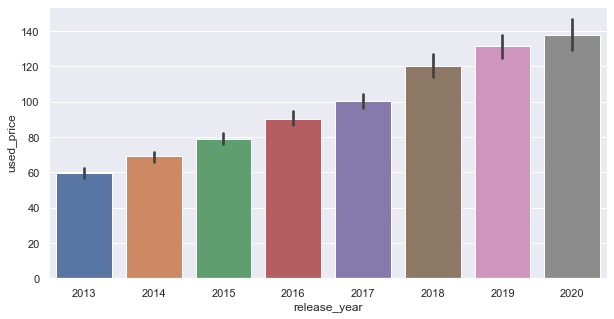

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="release_year", y="used_price")
plt.show()

#### There seems to be a very clear trend of the used price of mobile devices going up year on year

#### Let's understand the distribution of 4G and 5G devices with regards to price segments.

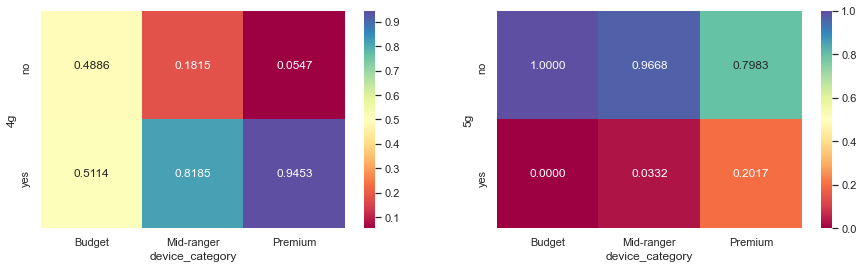

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(15, 4))

## create crosstab for 4g
plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

## create crosstab for 5g
plt.subplot(122)
sns.heatmap(
    pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)
plt.show()

#### Observation
- There is a high number of 4g enabled devices that are premium compared to non-4g enabled devices
- A higher number of mid ranger devices are not 4g enable
- A low number of 5g enabled devices fall under premium while a very high number or devices that are not 5g enable range between busget and mid-ranger


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [52]:
# Create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [53]:
# check for missing values
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

In [54]:
## Impute missing values in cols_impute with median by grouping the data on release year and brand name
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby(["release_year", "brand_name"])[col].transform(
        lambda x: x.fillna(
            x.median()
        )  ## apply mean to missing values using lambda function
    )

<IPython.core.display.Javascript object>

In [55]:
# check for missing values again
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            0
ram                   0
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

In [56]:
# impute the missing values in cols_impute with median by grouping the data on brand name
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]
for col in cols_impute:
    df1[col] = df1.groupby("brand_name")[col].transform(
        lambda x: x.fillna(x.median())
    )  ## apply mean to missing values using lambda function

<IPython.core.display.Javascript object>

In [57]:
# check for missing values again
df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
used_price_log       0
new_price_log        0
device_category      0
dtype: int64

<IPython.core.display.Javascript object>

In [58]:
## Fill in missing the data in main_camera_mp column with the median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
## checking for missing values again
df1.isnull().sum()


brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
device_category     0
dtype: int64

<IPython.core.display.Javascript object>

#### No more missing values !!!

## EDA

- Compare the manipulated dataframe with the orgiginal to ensureno major error was made during manipulation

In [59]:
df1.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.617597,6.555067,54.528474,4.032620,3132.577446,182.636856,2015.965258,674.869716,237.038848,92.302936,4.364712,5.233107
std,3.805280,4.749438,6.968440,84.934991,1.368598,1298.884193,88.360445,2.298455,248.580166,194.302782,54.701648,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,18.200000,4.650000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,120.342500,56.482500,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,189.785000,81.870000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,291.115000,116.245000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,2560.200000,749.520000,6.619433,7.847841


<IPython.core.display.Javascript object>

In [60]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,237.038848,92.302936,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,194.302782,54.701648,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,18.200000,4.650000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,120.342500,56.482500,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,189.785000,81.870000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,291.115000,116.245000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,2560.200000,749.520000,6.619433,7.847841


<IPython.core.display.Javascript object>

#### Lets check for outliers

<Figure size 1080x864 with 0 Axes>

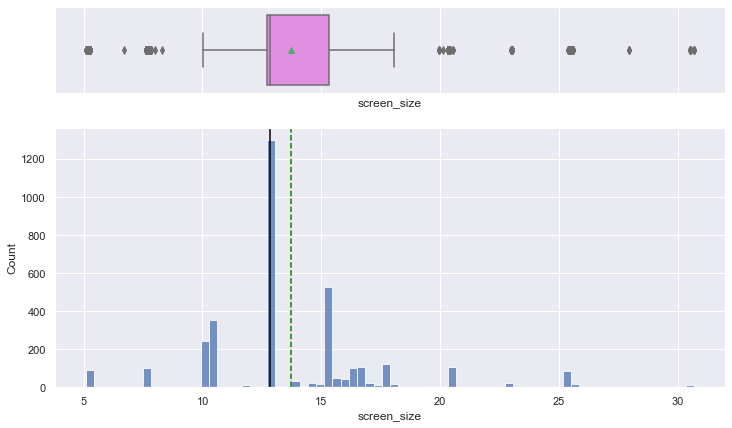

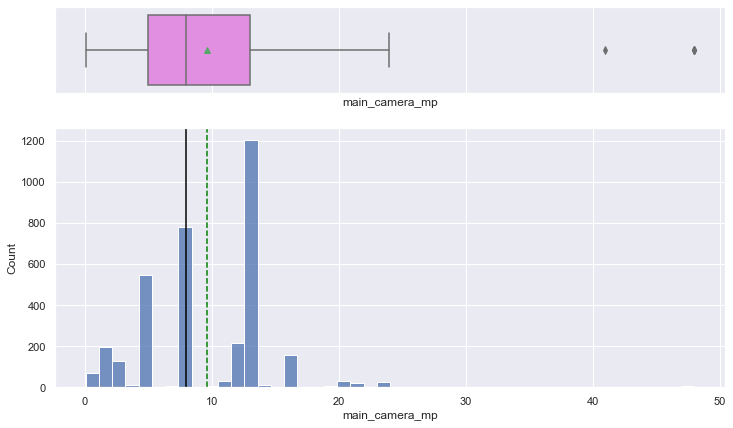

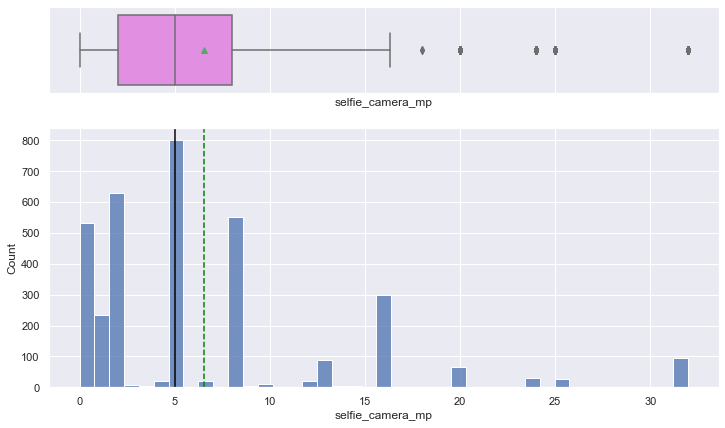

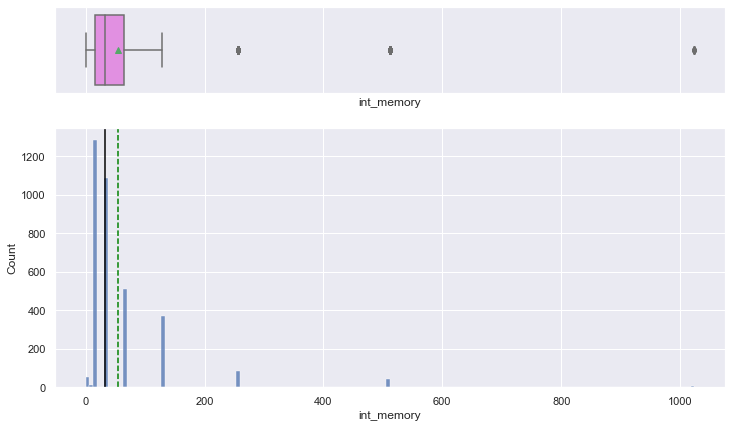

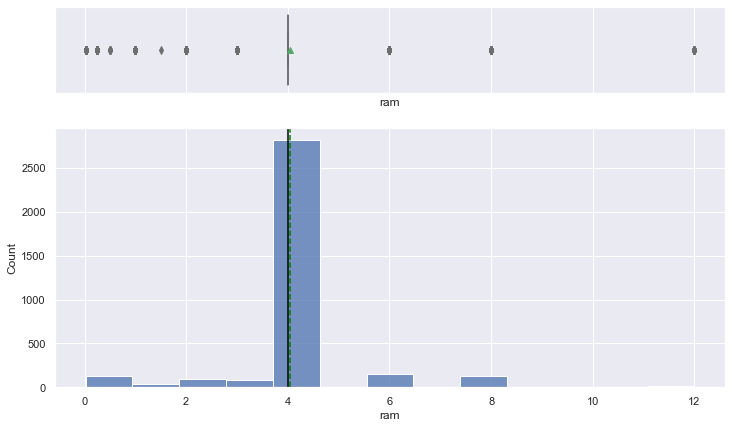

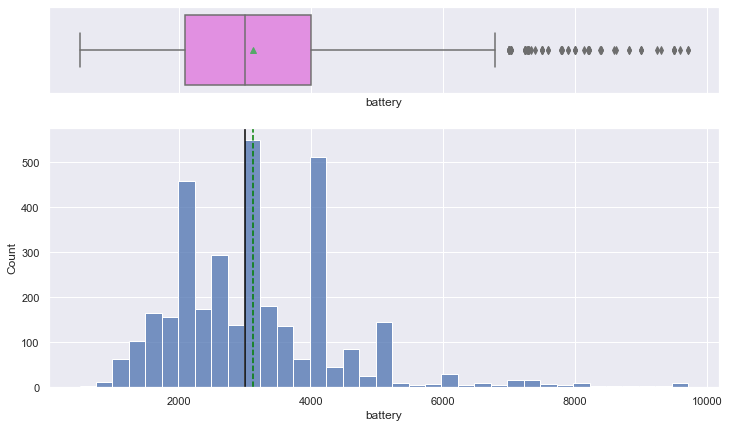

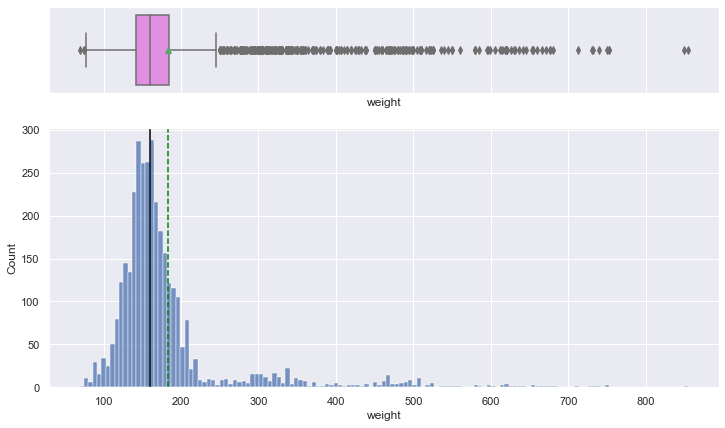

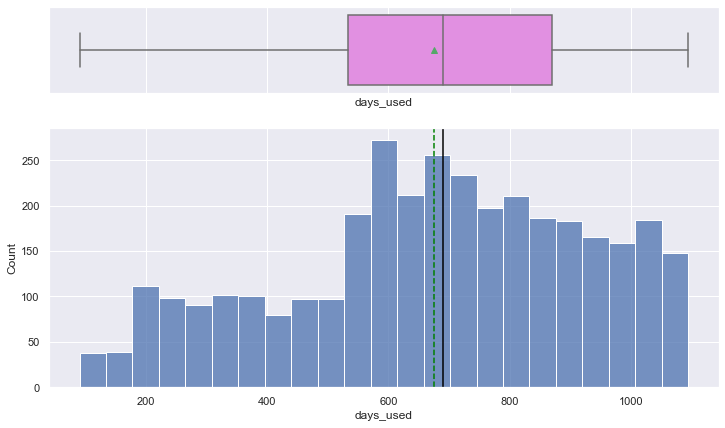

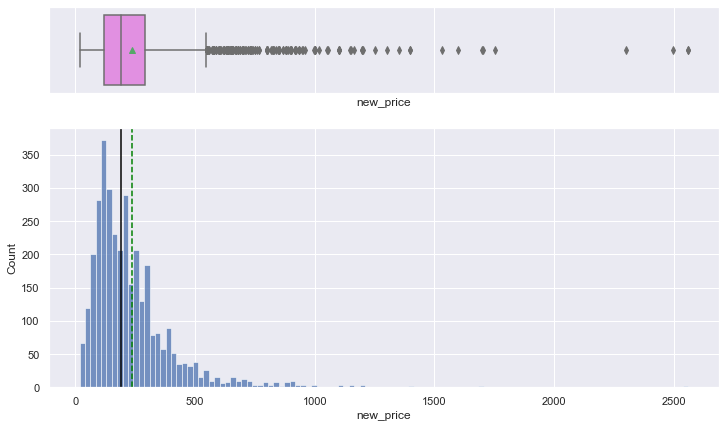

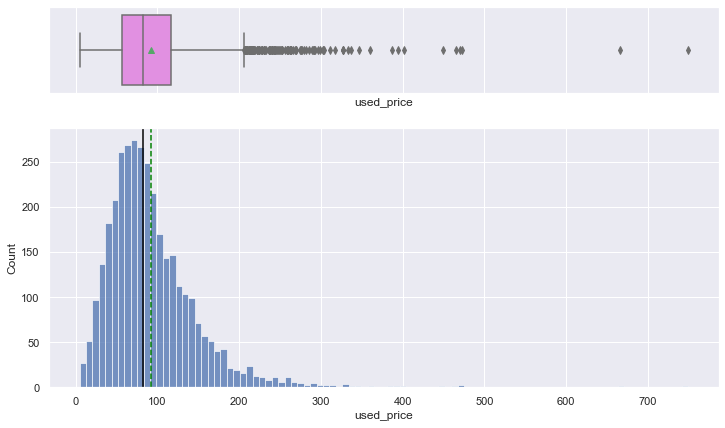

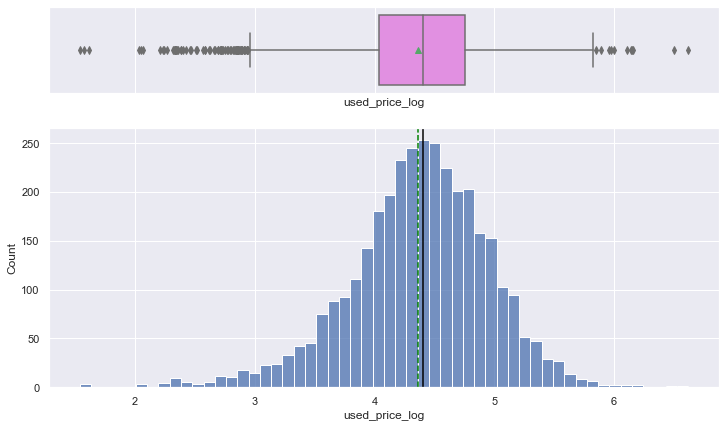

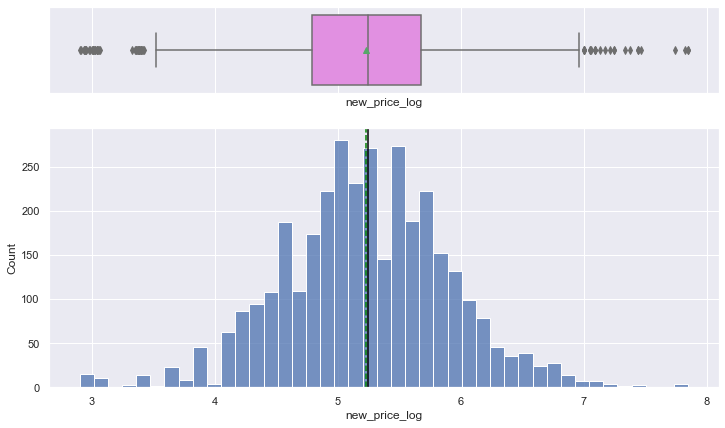

<IPython.core.display.Javascript object>

In [61]:
# Check for outlier creating boxplots for all numerical columns
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    histogram_boxplot(df1, variable)
plt.show()

#### Prepare data for modelling
Before building a linear regression model to help us predict the used price of  mobile devices it is essential that we prepare the data by:
- We normalized the `used_price_log` column for modeling.
- Ensure that all categorical features are correctly encoded.
- Split data into train and test to be able to evaluate the model that we build on the train data.

In [62]:
# defining the dependent and independent variables
X = df1.drop(
    ["new_price", "used_price", "used_price_log", "device_category"], axis=1
)  ## Code to drop "new_price", "used_price", "used_price_log", "device_category" from the data
y = df1["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price_log  
0        127       4.715100  
1        325       5.519018  
2        162       5.884631  
3        345       5.630961  
4        293       4.947837  

0    4.

<IPython.core.display.Javascript object>

In [63]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## function to create dummies for independent features

X.head()



,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [64]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [65]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Building a Linear Regression model

In [66]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

## fit OLS model
olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     268.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:55:48   Log-Likelihood:                 123.85
No. Observations:                2417   AIC:                            -149.7
Df Residuals:                    2368   BIC:                             134.0
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -46.50

<IPython.core.display.Javascript object>

## Model performance evaluation

**Let's test the model performance.**

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE and MAE.
* We will define a function to calculate MAPE.

In [67]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse, "MAE": mae, "MAPE": mape,}, index=[0],)

    return df_perf

<IPython.core.display.Javascript object>

In [68]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(
    olsmodel1, x_train1, y_train
)  ## code to check the performance on train data
olsmodel1_train_perf

Training Performance



,RMSE,MAE,MAPE
0,25.125054,16.539533,18.872602


<IPython.core.display.Javascript object>

In [69]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(
    olsmodel1, x_test1, y_test
)  ## code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,MAPE
0,24.257688,16.599489,19.45067


<IPython.core.display.Javascript object>

#### Observations

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

- We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [71]:
checking_vif(x_train1)  ## Code to check VIF on train data

,feature,VIF
0,const,3.791593e+06
1,screen_size,7.677290e+00
2,main_camera_mp,2.285051e+00
3,selfie_camera_mp,2.812473e+00
4,int_memory,1.364152e+00
5,ram,2.282352e+00
6,battery,4.081780e+00
7,weight,6.396749e+00
8,release_year,4.899007e+00
9,days_used,2.660269e+00


<IPython.core.display.Javascript object>

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [72]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [73]:
## Check the effect of dropping columns
col_list = [
    "screen_size",
    "weight",
    "brand_name_Others",
    "brand_name_Huawei",
    "brand_name_Samsung",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.841808,0.232201
1,brand_name_Others,0.841806,0.232203
2,brand_name_Samsung,0.841774,0.232227
3,screen_size,0.838381,0.234703
4,weight,0.838071,0.234928


<IPython.core.display.Javascript object>

#### Observation
- As you can see the adjusted R-squared for dropping each of these columns is less that the current adjusted R-squared of 0.842
- This means we will not gain anything from dropping these columns since we can already explain 84.2% of our data compared to the proposed 84.18% which is almost no change
- We will now move on to improving our model throgh other means

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [74]:
# initial list of columns
cols = x_train1.columns.tolist()  ## Code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]  ## Code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'release_year', 'new_price_log', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


<IPython.core.display.Javascript object>

In [75]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

<IPython.core.display.Javascript object>

In [76]:
## Rebuild the model after changes
olsmodel2 = sm.OLS(y_train, x_train2).fit()  ## Code fit OLS() on y_train and x_train2
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     988.1
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:55:49   Log-Likelihood:                 104.71
No. Observations:                2417   AIC:                            -181.4
Df Residuals:                    2403   BIC:                            -100.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -38.9410      7.28

<IPython.core.display.Javascript object>

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,MAPE
0,25.586129,16.733439,19.040517


<IPython.core.display.Javascript object>

In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(
    olsmodel2, x_test2, y_test
)  ## Code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,MAPE
0,24.088241,16.47575,19.256199


<IPython.core.display.Javascript object>

**Now we'll check the rest of the assumptions on *olsmodel2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.

In [79]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  ## Code to store the actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855243,0.232245
1525,4.448399,4.628813,-0.180413
1128,4.315353,4.280778,0.034574
3003,4.282068,4.206270,0.075798
2907,4.456438,4.470315,-0.013877


<IPython.core.display.Javascript object>

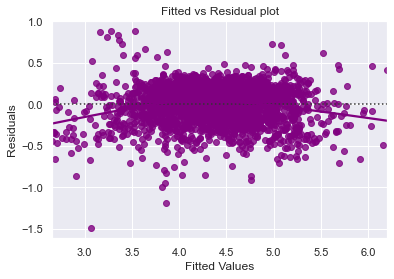

<IPython.core.display.Javascript object>

In [80]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.

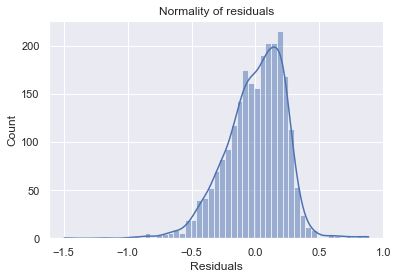

<IPython.core.display.Javascript object>

In [81]:
sns.histplot(
    data=df_pred, x="Residuals", kde=True
)  ## Complete the code to test the normality
plt.title("Normality of residuals")
plt.show()

#### Observations

- The histogram of residuals almost has a bell shape structure.
- Let's check the Q-Q plot.

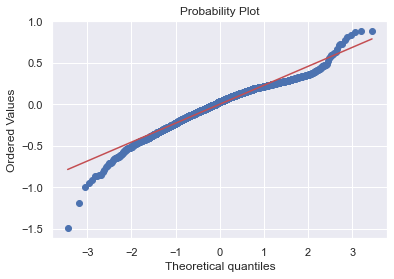

<IPython.core.display.Javascript object>

In [82]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)  ## Code check Q-Q plot
plt.show()

#### Observations

- The residuals almost follow a straight line.
- Let's check the results of the Shapiro-Wilk test.

In [83]:
stats.shapiro(df_pred["Residuals"])  ## Code to check p-value

ShapiroResult(statistic=0.9690961837768555, pvalue=2.130726936518395e-22)

<IPython.core.display.Javascript object>

**Observations**

- Since p-value < 0.05, there is now enough evidence to say that the residuals do not originate from a normal distribution as per the Shapiro-Wilk test.
- So, the assumption is not satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [84]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(
    df_pred["Residuals"], x_train2
)  ## Code to check homoscedasticity
lzip(name, test)

[('F statistic', 1.0438035947010245), ('p-value', 0.22944475832470757)]

<IPython.core.display.Javascript object>

#### Observations

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

#### All the assumptions of linear regression are satisfied except normality of residuals. Let's rebuild our final model, check its performance, and draw inferences from it.

## Final Model Summary

In [85]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()  ## Code to fit the final model
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     988.1
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:55:52   Log-Likelihood:                 104.71
No. Observations:                2417   AIC:                            -181.4
Df Residuals:                    2403   BIC:                            -100.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -38.9410      7.28

<IPython.core.display.Javascript object>

In [86]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train2, y_train
)  ## Code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,MAPE
0,25.586129,16.733439,19.040517


<IPython.core.display.Javascript object>

In [87]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test2, y_test
)  ## Code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,MAPE
0,24.088241,16.47575,19.256199


<IPython.core.display.Javascript object>

### Question 7. Which attributes are highly correlated with the price of a used device?
- The new price, se,fie camera, battery, screens size, and ram are most correlated to the price of used devices

## Actionable Insights and Recommendations

Observations
- The training R squared is 0.842 and the train and test RMSE and MAE are close so the model is not underfitting
- MAE suggests that the model can predict the device used price within a mean error of 16.4 euros on the test data
- MAPE of 19.25 on test data means that we are able to to predict within 19% of the mobile device used prices
- The quation for this linerar regression is : 
y = 0.0256*screen_size + 0.0212*main_camera_mp + 0.0140*selfie_camera_mp + 0.0175*ram -1.507e-05*battery + 0.0009*weight + 0.0199*release_year + 0.4222*new_price_log + 0.0492*brand_name_Lenovo +  0.0675 *brand_name_Nokia + 0.0893*brand_name_Xiaomi - 0.0704*os_Others + 0.0499*4g_yes + -38.9410 

Conclusion
- The new price, brand and screen size and main camera resolution plays a big role in predicting the used price of a mobile device
- The selfie camera resolution, ram and battery and release year are also noticable factors in predicting the used price of a mobile device

Recommendation
- Explore more of the unknownbrand names and ensure we understand the role they play to improve our prediction
- Also, considering the large amount of outliers present in the data it would be worth investigating the reason for this to further improve our model.